# Unit tests

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import fitsio
from glob import glob
import os
import pandas as pd
from scipy.stats import sigmaclip

from astrometry.util.fits import fits_table, merge_tables

from obiwan.common import fits2pandas
import legacyzpts.test.test_compare_legacy_idl as test

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Compare results to IDL zeropoints/matches files

In [4]:
zpt= test.test_load_zpts(camera='decam', plot=False)
test.test_values_zpts(zpt)


Already exists: /home/kaylan/myrepo/legacyzpts/py/legacyzpts/test/testdata/idl_legacy_data.tar.gz
Merged zpt data: zpts=183
Merged zpt data: zpts=180
Wrote /home/kaylan/myrepo/legacyzpts/py/legacyzpts/test/testoutput_shared/expnum2exptime.json
Wrote /home/kaylan/myrepo/legacyzpts/py/legacyzpts/test/testoutput_shared/expnum2gain.json


count    176.000000
mean       0.002536
std        0.002234
min        0.000023
25%        0.000901
50%        0.001874
75%        0.003510
max        0.011887
Name: diff, dtype: float64


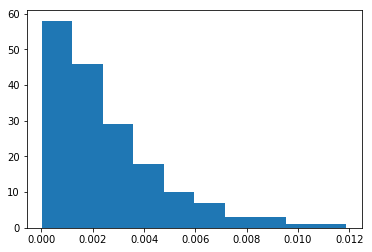

In [6]:
diff,_,_=sigmaclip(zpt.legacy.data.ccdzpt - 
            zpt.idl.data.ccdzpt)
df= pd.DataFrame({'diff':np.abs(diff)})
_=plt.hist(df['diff'])
print(df['diff'].describe())

In [5]:
star= test.test_load_stars(camera='decam', plot=False)
test.test_values_stars(star)

Already exists: /home/kaylan/myrepo/legacyzpts/py/legacyzpts/test/testdata/idl_legacy_data.tar.gz
Merged zpt data: zpts=13278
Merged zpt data: zpts=13354
Read /home/kaylan/myrepo/legacyzpts/py/legacyzpts/test/testoutput_shared/expnum2exptime.json
Read /home/kaylan/myrepo/legacyzpts/py/legacyzpts/test/testoutput_shared/expnum2gain.json


# Inspect

In [ ]:
zpt.legacy.data.columns

In [ ]:
star.legacy.data.columns